
___

<div style="text-align: center;">
  <span style="font-family: 'Playfair Display', serif; font-size: 24px; font-weight: bold;">
Tractament de l'Ontologia de CLIPS a Python
  </span>
</div>


___

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


<div style="background-color:#F2F2F2; padding: 10px;">
    <div style="text-align: center;">
  <span style="font-family: 'Playfair Display', serif; font-size: 20px; font-weight: bold;">
1. Extracció de les Dades
  </span>
</div>


In [2]:
# Careguem la ontologia en format CLIPS i identifiquen les diferents classes
with open('ontologia.clp', 'r') as file:

    for i, line in enumerate(file):
        if i < 30:
            print(line.strip()) 
        else:
            break

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
;;                                                                         ;;
;;                         Ontologia Literaria                             ;;
;;                                                                         ;;
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
;; Llibres: 107                                                            ;;
;; - Atributs: escrit per, pertany a, any de publicació, edat mínima,      ;;
;;             editorial, número de pàgines, best seller,                  ;;
;;             adaptació a pel·lícula, saga, format, títol.                ;;
;;                                                                         ;;
;; Lectors: 52                                                             ;;
;; - Atributs: preferència per autor, preferència per gènere,              ;;
;;             llibres preferits, interessos acadèmics,         

### Funció `extract_instances`
<div class="alert alert-block alert-info" style="color: #0277BD; background-color: #E1F5FE;">

#### Descripció:
Extreu instàncies d'un fitxer en llenguatge CLIPS d'una una ontologia literària per adaptar-la a Python.

#### Processament:
1. Inicialitza una llista buida per emmagatzemar les dades de les instàncies.
2. Defineix patrons de regex per extreure instàncies i atributs.
3. Obre el fitxer CLIPS i llegeix el contingut dins del rang de línies especificat.
4. Troba totes les instàncies amb regex i itera a través de cadascuna.
5. Extreu les dades de les instàncies, incloent el nom i els atributs, i organitza-les en diccionaris.
6. Afegeix les dades de cada instància a la llista.
7. Retorna la llista de dades d'instàncies extretes.
    
</div>
    


In [3]:
def extract_instancies(path_fitxer, min_line, max_line, nom_inst):
    """
    Args:
        path_file (str): Ruta del fitxer .clp a processar.
        min_line (int): Línia d'inici per llegir el fitxer.
        max_line (int): Línia de final per llegir el fitxer.
        nom_inst (str): Nom de la instància a cercar en format d'expressió regular.

    Returns:
        list: Una llista de diccionaris on cada diccionari representa les dades 
              d'una instància extreta.
    """

    books_data = []
    book_instance_regex = r'\(\[([^\]]+)\] of '+ nom_inst + r'\n(.*?)\n\s*\)'
    attribute_regex = r'\(([^)]+)\)'

    with open(path_fitxer, 'r') as file:
        content = ''.join(file.readlines()[min_line:max_line]) 
        book_instances = re.findall(book_instance_regex, content, re.DOTALL)

        for name, attributes_block in book_instances:
            attributes = re.findall(attribute_regex, attributes_block)
            book_data = {"nom": name}
            for attribute in attributes:
                key, value = attribute.split(' ', 1)
                book_data[key.strip()] = value.strip()
            books_data.append(book_data)

    return books_data

<div style="background-color:#F2F2F2; padding: 10px;">
    <div style="text-align: center;">
  <span style="font-family: 'Playfair Display', serif; font-size: 20px; font-weight: bold;">
1.1 Extració d'instàncies a diccionari Python
</span>     
</div>
</div>
    
            
#### Identificació de línies dins fitxer

- Les instàncies de llibres es troben de les línies 169 a la 1871.
- Les instàncies dels gèneres es troben de les línies 1872 a 1933.
- Les instàncies dels autors es troben de la línia 1935 a la 2902.
- Les instàncies dels Lectors es troben de la línia 2903 a la 3633.

In [4]:
llibres = extract_instancies('ontologia.clp', 166, 1889, 'Llibre')
generes = extract_instancies('ontologia.clp', 1884, 1950, 'Genere')
autors = extract_instancies('ontologia.clp',1935 , 2970, 'Autor_a')
lectors = extract_instancies('ontologia.clp', 2915, 3700, 'Lector_a')

In [5]:
# Random book d'exemple:
n = np.random.randint(0, high=len(llibres))
llibres[n]

{'nom': 'El_ano_en_que_me_enamore_de_todas',
 'escrit_per': '[Use_Lahoz]',
 'pertany_a': '[Romance] [Ficcio]',
 'any_publicacio': '2013',
 'edat_minima': '10',
 'editorial': '"Espasa"',
 'adaptacio_a_pelicula': '"No"',
 'best_seller': '"No"',
 'saga': '"No"',
 'format': '"Tapa blanda"',
 'num_pagines': '304',
 'titol': '"El año en que me enamoré de todas"',
 'traduccions': '"Castella"',
 'valoracio': '3.6'}

In [6]:
# Random gènere literari d'exemple:
n = np.random.randint(0, high=len(generes))
generes[n]

{'nom': 'Juvenil',
 'genere': '"Juvenil"',
 'finalitat': '"Entreteniment" "Aprenentatge" "Adolescencia" "Imaginació"'}

In [7]:
# Random autor d'exemple:
n = np.random.randint(0, high=len(autors))
autors[n]

{'nom': '"CS_Lewis"',
 'genere_predeterminat': '[Fantasia]',
 'any_naixement': '1898',
 'genere_persona': '"home"',
 'idioma': '"Angles"',
 'tipus_lectura': '"Densa"',
 'tipus_llenguatge': '"Elaborat"'}

In [8]:
# Random lector d'exemple:
n = np.random.randint(0, high=len(lectors))
lectors[n]

{'nom': 'lector_37',
 'te_preferencia_per_autor': '[JK_Rowling] [Ken_Follett] [Suzanne_Collins] [Noah_Gordon]  [Juan_Gomez_Jurado]',
 'te_preferencia_per_genere': '[Ficcio] [Ciencia_Ficcio] [Policiaca] [Fantasia]',
 'ha_llegit': '[La_Catedral_del_Mar] [The_Pillars_of_the_Earth] [La_Novia_Gitana] [Reina_Roja] [Los_Juegos_del_Hambre] [Divergente] [Los_Ojos_Amarillos_de_los_Cocodrilos]',
 'interessos_academics': '"Auditora_financiera"',
 'pref_adaptacio_peli': '"Si"',
 'pref_best_seller': '"No"',
 'pref_sagues': '"Si" "No"',
 'pref_tipus_lectura': '"Fluida"',
 'ventall_pagines': '"No tinc preferència"',
 'any_naixement': '1964',
 'genere_persona': '"dona"'}

<div style="background-color:#F2F2F2; padding: 10px;">
    <div style="text-align: center;">
  <span style="font-family: 'Playfair Display', serif; font-size: 20px; font-weight: bold;">
2.  Tractament de les dades a Dataframe
  </span>
</div>
</div>



Primer convertim les llistes de diccionaris a pandas dataframes.

- Llibres 
- Autors
- Lectors
- Generes (per poder fer estructura arbre)


In [9]:
dataframe_llibres = pd.DataFrame(llibres)
dataframe_autors = pd.DataFrame(autors)
dataframe_generes = pd.DataFrame(generes)
dataframe_lectors = pd.DataFrame(lectors)


In [10]:
# Pel processament: 
# Funcions que converteix les features multiples en sets i netejen de simbols les strings

def convertir_en_sets(df, columnes_en_sets):
    
    # Netejem les strings
    for columna in df.columns:
        df[columna] = df[columna].apply(lambda x: x.replace("[", "").replace("]", "").replace('"', ''))
    
    # Convertim en sets les múltiples
    for columna in columnes_en_sets:
        df[columna] = df[columna].apply(lambda x: set(filter(None, map(str.strip, x.split(' ')))) if x else set())
    
    return df


In [11]:
dataframe_llibres = convertir_en_sets(dataframe_llibres, ['pertany_a', 'format', 'traduccions'])
dataframe_generes = convertir_en_sets(dataframe_generes, ['finalitat'])
dataframe_autors = convertir_en_sets(dataframe_autors, ['genere_predeterminat', 'idioma'])
dataframe_lectors = convertir_en_sets(dataframe_lectors, ['pref_tipus_lectura', 'interessos_academics', 'ha_llegit', 'te_preferencia_per_genere', 'te_preferencia_per_autor', 'pref_sagues'])

In [12]:
# Treiem la string Tapa dins del sets de formats
dataframe_llibres['format'] = dataframe_llibres['format'].apply(lambda x: x - {'Tapa'} if 'Tapa' in x else x)
dataframe_llibres['id_llibre'] =  dataframe_llibres.index
column_order = ['id_llibre', 'titol'] + [col for col in dataframe_llibres.columns if col not in {'id_llibre', 'titol'}]
dataframe_llibres = dataframe_llibres[column_order]
dataframe_llibres['edat_minima'] = dataframe_llibres['edat_minima'].replace('None', '0')


In [13]:
dataframe_generes.head(2)


,nom,genere,finalitat
0,Ciencia,Ciencia,"{Innovació, Inspiració, Exploració, Coneixement}"
1,Comedia,Comedia,"{Rialles, Entreteniment, Diversió, Humor, Rela..."


In [14]:
dataframe_autors.head(2)


,nom,genere_predeterminat,any_naixement,genere_persona,idioma,tipus_lectura,tipus_llenguatge
0,Andrzej_Sapkowski,{Fantasia},1948,home,{Polones},Fluida,Coloquial
1,Anne_Frank,{Historica},1929,dona,{Neerlandes},Fluida,Coloquial


In [15]:
dataframe_lectors.head(2)


,nom,te_preferencia_per_autor,te_preferencia_per_genere,ha_llegit,interessos_academics,pref_adaptacio_peli,pref_best_seller,pref_sagues,pref_tipus_lectura,ventall_pagines,any_naixement,genere_persona
0,lector_1,{Madelline_Miller},"{Ficcio, Romance, Ciencia_Ficcio, Comedia, His...","{The_song_of_Achiles, Pride_and_Prejudice, Con...",{IA},Si,No,{No},"{Densa, Fluida}",150-350,2003,dona
1,lector_3,"{Rick_Riordan, JK_Rowling}",{Fantasia},"{Percy_Jackson_i_els_herois_grecs, Los_Futboli...",{Estudis},Si,Si,{Si},{Fluida},150-350,2011,home


<div style="background-color:#F2F2F2; padding: 10px;">
    <div style="text-align: center;">
  <span style="font-family: 'Playfair Display', serif; font-size: 20px; font-weight: bold;">
2.  Dataframe Lectors a Base de Casos (per Inicialització)
  </span>
</div>
</div>

In [16]:
# Fem un explode perquè cada llibre que han llegit els usuaris de l'enquesta sigui un cas individual
# Escollim només els altributs que ens interessen
casos_usuaris = dataframe_lectors[['te_preferencia_per_genere', 'ha_llegit', 'pref_adaptacio_peli', 'pref_best_seller', 'pref_tipus_lectura', 'any_naixement', 'genere_persona', 'pref_sagues','ventall_pagines']].explode('ha_llegit')#.reset_index(drop=True) # No si ens volem guardar el id de usuari

# Canviem la columna a recomanacions llibre a Recomanacions_Llibre
casos_usuaris = casos_usuaris.rename(columns={'ha_llegit': 'llibre_recomanat'})

# Fem que la primera lletra de la feature genere_persona sigui majuscula
casos_usuaris['genere_persona'] = casos_usuaris['genere_persona'].str.capitalize()

# Ens guardem el id d'usuari per fer-lo servir a posteriori
casos_usuaris['id_usuari'] = casos_usuaris.index
# Aafegim a casos ususaris el id de llibres corresponent a la base de llibres
casos_usuaris = pd.merge(casos_usuaris, dataframe_llibres[['nom', 'id_llibre', 'valoracio']], left_on='llibre_recomanat', right_on='nom', how='left')

# Afegim el nombre de lectures dins la base de llibres
dataframe_llibres['num_lectures'] = [len(casos_usuaris[casos_usuaris['id_llibre'].isin([dataframe_llibres['id_llibre'][i]])]) for i in range(len(dataframe_llibres))]

# Score: Totes les instàncies que hi han són llibres preferits dels usuaris 
# per tant tenen nivell de recomanació molt alt, introduïm a la base de casos la valoració 
# mitjana dels usuaris de la font d'informació eBIB  i li afegim 5 
# i ho divim entre dos per assegurarnos **un rang alt de puntuacions variat**

casos_usuaris['comprat'] = 'Si'

casos_usuaris['score'] = (casos_usuaris['valoracio'].astype('float') + 5) / 2

# Ordenem els df per atributs per representació més clara + eliminem llibre_recomanat x redundància
column_order = ['id_usuari', 'id_llibre', 'score', 'genere_persona', 'any_naixement', 'te_preferencia_per_genere', 'pref_adaptacio_peli', 'pref_best_seller', 'pref_tipus_lectura', 'pref_sagues','ventall_pagines', 'comprat']
casos_usuaris = casos_usuaris[column_order].reset_index(drop=True)

In [17]:
dataframe_llibres

,id_llibre,titol,nom,escrit_per,pertany_a,adaptacio_a_pelicula,any_publicacio,edat_minima,editorial,format,num_pagines,best_seller,saga,traduccions,valoracio,num_lectures
0,0,Norwegian Wood,Norwegian_Wood,Haruki_Murakami,{Ficcio},Si,1987,3,Editorial Tusquets Editores,"{blanda, eBook, dura}",400,Si,No,"{Italia, Japones, Catala, Alemany, Castella, A...",4.5,1
1,1,Bridget Jones's Diary,Bridget_Joness_Diary,Helen_Fielding,{Romance},Si,1996,13,Editorial Picador,"{blanda, eBook, dura}",464,Si,Si,"{Italia, Catala, Castella, Angles, Frances}",4.7,1
2,2,Do Androids Dream of Electric Sheep?,Do_Androids_Dream_of_Electric_Sheep,Philip_K_Dick,{Ciencia_Ficcio},No,1968,13,Editorial Doubleday,{blanda},208,Si,No,"{Angles, Alemany, Castella, Frances}",4.4,0
3,3,Harry Potter and the Philosopher's Stone,Harry_Potter_and_the_Philosophers_Stone,JK_Rowling,"{Juvenil, Fantasia}",Si,2000,9,Editorial Bloomsbury Publishing PLC,"{blanda, eBook, dura}",336,Si,Si,"{Italia, Catala, Alemany, Castella, Angles, Fr...",4.7,7
4,4,Song of Achilles,The_song_of_Achiles,Madeline_Miller,"{Romance, Historica, Ficcio}",No,2012,13,Ecco Suma de Letras,"{blanda, eBook, dura}",497,Si,No,"{Angles, Italia, Castella, Japones}",4.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,102,Los Ojos Amarillos de los Cocodrilos,Los_Ojos_Amarillos_de_los_Cocodrilos,Katherine_Pancol,"{Romance, Ficcio}",Si,2006,18,B DE BOLSILLO,"{eBook, dura, blanda}",552,Si,Si,"{Angles, Portugues, Castella, Catala, Frances}",4.4,1
103,103,Este dolor no es mío,Este_dolor_no_es_mio,Mark_Wolynn,{Creixement_personal},No,2016,18,GAIA,"{blanda, eBook, dura}",288,Si,No,"{Angles, Frances, Castella, Alemany}",4.8,1
104,104,El expreso de Tokio,El_expreso_de_Tokio,Seicho_Matsumoto,"{Policiaca, Ficcio}",No,1958,15,ASTEROIDE,"{eBook, dura, blanda}",220,No,No,"{Rus, Croata, Castella, Suec, Turc, Corea, Tai...",4,1
105,105,El sabueso de los Baskerville,El_Sabueso_de_los_Baskerville,Arthur_Conan_Doyle,"{Policiaca, Ficcio}",Si,1901,12,Nórdica Libros,"{eBook, dura, blanda}",256,Si,Si,"{Italia, Angles, Castella, Portugues, Catala, ...",4.3,1


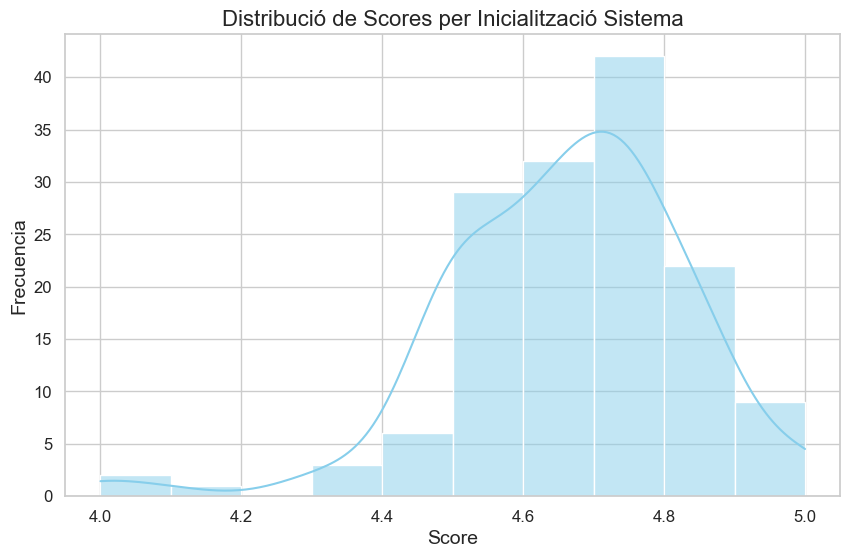

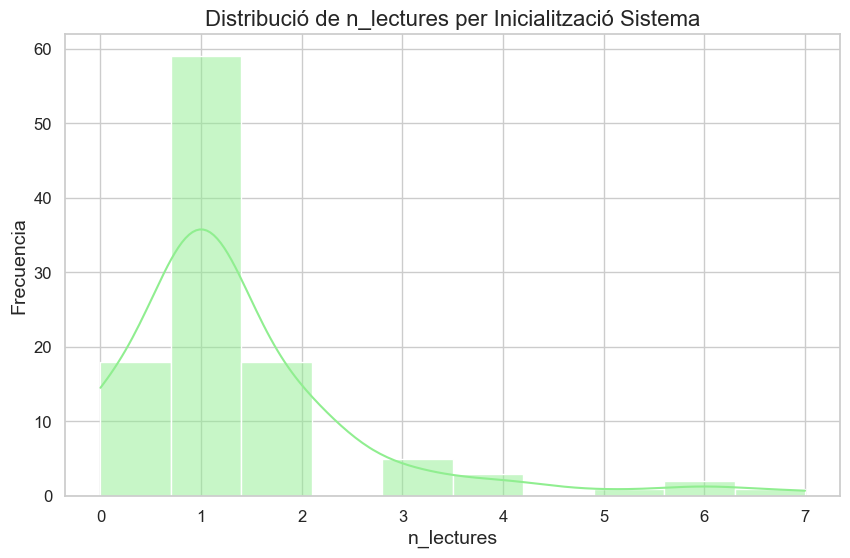

In [18]:
# Gràfic per visualitzar distribució de score per INICIALITZACIÓ
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(casos_usuaris['score'], kde=True, color='skyblue', bins=10)

# Personalizar el gráfico
plt.title('Distribució de Scores per Inicialització Sistema', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()


# Gràfic per visualitzar distribució de score per INICIALITZACIÓ
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(dataframe_llibres['num_lectures'], kde=True, color='lightgreen', bins=10)

# Personalizar el gráfico
plt.title('Distribució de n_lectures per Inicialització Sistema', fontsize=16)
plt.xlabel('n_lectures', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

<div class="alert alert-block alert-info" style="color: #0277BD; background-color: #E1F5FE;">

+ Distribució normal de Scores per iniciar el sistema, amb un rang de puntuacions elevades de 4 a 5.
+ Distribució de nombre de lectures dins els llibres del sistema decreixent, amb la **majoria de llibres** concentrats a **una lectura** el que ens permet identificar en un principi la majoria de llibres amb una descripció de casos única. 
    + Un **conjunt de llibres** més petit amb **més de 3 lectures fins a** llibres molt populars dins dels casos inicialització amb **7 lectures**. Ens permet saber quins són els llibres més recomanats i llegits per els nostres casos inicials.
    
</div>

#### 2.1 Dummies de les variables múltiples

In [19]:
# Variables dummies binaries per genere
genere_dummies = casos_usuaris['te_preferencia_per_genere'].apply(lambda x: {genere: 1 for genere in x})
# Convertir a DataFrame
genere_dummies = pd.DataFrame(list(genere_dummies), index=casos_usuaris.index).fillna(0).astype(int)
casos_usuaris = pd.concat([casos_usuaris, genere_dummies], axis=1).drop('te_preferencia_per_genere', axis=1)

In [20]:
# Variable preferència tipus de lectura es vol tractar com a dummie amb Fluida o bé densa descomentar
#tipus_lectura_dummies = casos_usuaris['pref_tipus_lectura'].apply(lambda x: {tipus: 1 for tipus in x})
# Convertir a DataFrame
#tipus_lectura_dummies = pd.DataFrame(list(tipus_lectura_dummies), index=casos_usuaris.index).fillna(0).astype(int)
#casos_usuaris = pd.concat([casos_usuaris, tipus_lectura_dummies], axis=1).drop('pref_tipus_lectura' , axis=1)

In [21]:
# Tractament ventall pagines
casos_usuaris['pagines_max'] = casos_usuaris['ventall_pagines'].str.extract(r'-(\d+)')
casos_usuaris['pagines_max'].fillna('100000000', inplace=True) # els usuaris que no hagin 
# posat un limit de pagines no tenen cap restricció per tant feature pren valor infinit
casos_usuaris['pagines_max'] = casos_usuaris['pagines_max'].astype(int)
casos_usuaris = casos_usuaris.drop('ventall_pagines' , axis=1)

In [22]:
# Funció per transformar els conjunts segons les regles especificades
def transformar_pref(pref):
    if 'No' in pref and 'Si' not in pref:
        return 'No'
    elif 'Si' in pref and 'No' not in pref:
        return 'Si'
    else:
        return 'Indiferent'
    
def transformar_estil_lectura(pref):
    if 'Densa' in pref and 'Fluida' not in pref:
        return 'Densa'
    elif 'Fluida' in pref and 'Densa' not in pref:
        return 'Fluida'
    else:
        return 'Indiferent'

# Aplicar la funció a la columna 'pref_sagues'
casos_usuaris['pref_tipus_lectura'] = casos_usuaris['pref_tipus_lectura'].apply(transformar_estil_lectura)
casos_usuaris['pref_sagues'] = casos_usuaris['pref_sagues'].apply(transformar_pref)


#### 2.2 Implementació de la Variable d'Idioma en les Mostres Inicials

**La inclusió de la variable "Idioma" en les mostres inicials no afectarà la generació del sistema**; simplement, s'utilitzarà per a la visualització i interpretació dels casos a la interfície. 

Amb l'objectiu de simplificar aquesta implementació, s'ha decidit donar més importància als següents idiomes: Català, Espanyol, Anglès, Francès i Alemany, amb les seves freqüències respectives (0.3, 0.3, 0.25, 0.1, 0.05).

Tot i que la variable d'idioma no influirà directament en la generació de contingut del sistema, és important tenir en compte que l'enquesta es va dur a terme a Catalunya, i aquest petit conjunt de mostres presenta una coherència.


In [23]:
# Frequències desitjades per cada idioma
frequencies = [0.3, 0.3, 0.25, 0.1, 0.05]

# Afegir la nova variable "Idioma" 
# Fixem una seed perque les respostes siguin reproduibles
np.random.seed(42)
idiomes = ['Català', 'Espanyol', 'Anglès', 'Francès', 'Alemany']

# Crear una funció per assignar idiomes als usuaris
def assigna_idiomes(group):
    idiomes_assignats = set(np.random.choice(idiomes, size=np.random.randint(1, 4), p=frequencies))
    group['Idioma'] = [idiomes_assignats.copy() for _ in range(len(group))]
    return group

# Afegir la nova variable "Idioma" al dataframe
casos_usuaris = casos_usuaris.groupby('id_usuari').apply(assigna_idiomes).reset_index(drop=True)



In [24]:
# Variables originals
original_columns = ['id_usuari', 'llibre_recomanat', 'score', 'genere_persona', 'any_naixement', 'pref_adaptacio_peli', 'pref_best_seller', 'pref_tipus_lectura', 'pref_sagues', 'pagines_max', 'Idioma']

# Variables binàries a dummies
columns_to_dummies = ['pref_adaptacio_peli', 'pref_best_seller', 'genere_persona', 'pref_sagues', 'pref_tipus_lectura']

# Crear dummies i afegir-les al DataFrame original
casos_usuaris_dummies = pd.get_dummies(casos_usuaris[columns_to_dummies], columns=columns_to_dummies)

# Concatenar el DataFrame original sense les columnes originals i el que conté les dummies
casos_usuaris_extended = pd.concat([casos_usuaris, casos_usuaris_dummies], axis=1)

In [25]:
casos_usuaris


,id_usuari,id_llibre,score,genere_persona,any_naixement,pref_adaptacio_peli,pref_best_seller,pref_tipus_lectura,pref_sagues,comprat,...,Ciencia_Ficcio,Comedia,Historica,Fantasia,Ciencia,Creixement_personal,Policiaca,Juvenil,pagines_max,Idioma
0,0,4,4.90,Dona,2003,Si,No,Indiferent,No,Si,...,1,1,1,0,0,0,0,0,350,"{Anglès, Català}"
1,0,16,4.85,Dona,2003,Si,No,Indiferent,No,Si,...,1,1,1,0,0,0,0,0,350,"{Anglès, Català}"
2,0,43,4.45,Dona,2003,Si,No,Indiferent,No,Si,...,1,1,1,0,0,0,0,0,350,"{Anglès, Català}"
3,0,84,4.70,Dona,2003,Si,No,Indiferent,No,Si,...,1,1,1,0,0,0,0,0,350,"{Anglès, Català}"
4,0,97,4.50,Dona,2003,Si,No,Indiferent,No,Si,...,1,1,1,0,0,0,0,0,350,"{Anglès, Català}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,50,66,4.65,Dona,2003,Si,No,Densa,Indiferent,Si,...,1,1,1,0,0,0,0,0,350,"{Espanyol, Francès}"
142,50,43,4.45,Dona,2003,Si,No,Densa,Indiferent,Si,...,1,1,1,0,0,0,0,0,350,"{Espanyol, Francès}"
143,51,38,4.60,Home,1998,No,No,Fluida,Indiferent,Si,...,0,0,0,0,0,1,0,0,150,"{Espanyol, Català}"
144,51,94,4.50,Home,1998,No,No,Fluida,Indiferent,Si,...,0,0,0,0,0,1,0,0,150,"{Espanyol, Català}"


<div style="background-color:#F2F2F2; padding: 10px;">
    <div style="text-align: center;">
  <span style="font-family: 'Playfair Display', serif; font-size: 15px; font-weight: bold;">
2.1  Exportació de les dades en dos csv 
  </span>
</div>
  </div>  
  
+ Posterior tractament en la `Representació del espai de casos`:
    + `casos_lectors.csv`
    + `casos_lectors_dummies.csv`
    




In [26]:
casos_usuaris.to_csv('Cases.csv', index=False)
dataframe_llibres.to_csv('Books.csv', index=False)
casos_usuaris_extended.to_csv('casos_lectors_extended.csv', index=False)
casos_usuaris_dummies.to_csv('casos_lectors_dummies.csv', index=False)
